# Comparing samples of wide binaries from different catalogs

In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import corner

import sys
sys.path.append('../src')
import P_random
import const as c

%matplotlib inline

/Library/Python/2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


### Import TGAS data

In [2]:
# Read in sample from TGAS table
# Read in sample from TGAS table
dtype = [('ID','<i8'),('tyc','S11'),('hip','<i8'),('ra','<f8'),('dec','<f8'),('mu_ra','<f8'),('mu_dec','<f8'), \
     ('mu_ra_err','<f8'),('mu_dec_err','<f8'),('plx','<f8'),('plx_err','<f8'), \
     ('mu_ra_mu_dec_cov','<f8'),('mu_ra_plx_cov','<f8'),('mu_dec_plx_cov','<f8'),('d_Q','<f8'),('noise','<f8')]

tgas_full = np.array([], dtype=dtype)

for i in np.arange(1):
    if i < 10:
        filename = ('../data/TGAS/TgasSource_000-000-00' + str(i) + '.csv')
    else:
        filename = ('../data/TGAS/TgasSource_000-000-0' + str(i) + '.csv')

    print filename
    tgas_tmp = Table.read(filename, format='csv', guess=True)
    
    

    tgas = np.zeros(len(tgas_tmp), dtype=dtype)

                                                  # Gaia units
    tgas['ID'] = tgas_tmp['source_id']
    tgas['tyc'] = tgas_tmp['tycho2_id']
    tgas['hip'] = tgas_tmp['hip']
    tgas['ra'] = tgas_tmp['ra']                   # degrees
    tgas['dec'] = tgas_tmp['dec']                 # degrees
    tgas['mu_ra'] = tgas_tmp['pmra']              # mas/yr
    tgas['mu_ra_err'] = tgas_tmp['pmra_error']    # mas/yr
    tgas['mu_dec'] = tgas_tmp['pmdec']            # mas/yr
    tgas['mu_dec_err'] = tgas_tmp['pmdec_error']  # mas/yr
    tgas['plx'] = tgas_tmp['parallax']            # mas
    tgas['plx_err'] = tgas_tmp['parallax_error']  # mas
    tgas['mu_ra_mu_dec_cov'] = tgas_tmp['pmra_pmdec_corr']*tgas_tmp['pmra_error']*tgas_tmp['pmdec_error']
    tgas['mu_ra_plx_cov'] = tgas_tmp['parallax_pmra_corr']*tgas_tmp['parallax_error']*tgas_tmp['pmra_error']
    tgas['mu_dec_plx_cov'] = tgas_tmp['parallax_pmdec_corr']*tgas_tmp['parallax_error']*tgas_tmp['pmdec_error']
    tgas['d_Q'] = tgas_tmp['astrometric_delta_q']
    tgas['noise'] = tgas_tmp['astrometric_excess_noise_sig']

    tgas_full = np.append(tgas_full, tgas)


../data/TGAS/TgasSource_000-000-000.csv


### Our pairs

In [18]:
dtype = [('P_posterior','<f8'), ('theta','<f8'),
         ('source_id_1','<i8'), ('TYC_id_1','S11'), ('hip_id_1','<i8'),
         ('ra_1','<f8'), ('dec_1','<f8'),
         ('mu_ra_1','<f8'), ('mu_dec_1','<f8'), ('mu_ra_err_1','<f8'), ('mu_dec_err_1','<f8'),
         ('plx_1','<f8'), ('plx_err_1','<f8'),
         ('gaia_g_flux_1','<f8'), ('gaia_g_flux_err_1','<f8'), ('gaia_g_mag_1','<f8'),
         ('TMASS_id_1','<i8'), ('TMASS_angle_dist_1','<f8'),
         ('TMASS_n_neighbours_1','<i8'), ('TMASS_n_mates_1','<i8'), ('TMASS_ph_qual_1','S11'),
         ('TMASS_ra_1','<f8'), ('TMASS_dec_1','<f8'),
         ('TMASS_j_mag_1','<f8'), ('TMASS_j_mag_err_1','<f8'),
         ('TMASS_h_mag_1','<f8'), ('TMASS_h_mag_err_1','<f8'),
         ('TMASS_ks_mag_1','<f8'), ('TMASS_ks_mag_err_1','<f8'),
         ('TYC_Vt_1','<f8'), ('TYC_Vt_err_1','<f8'),
         ('TYC_Bt_1','<f8'), ('TYC_Bt_err_1','<f8'),
         ('gaia_delta_Q_1','<f8'), ('gaia_noise_1','<f8'),
         #
         ('source_id_2','<i8'), ('TYC_id_2','S11'), ('hip_id_2','<i8'),
         ('ra_2','<f8'), ('dec_2','<f8'),
         ('mu_ra_2','<f8'), ('mu_dec_2','<f8'), ('mu_ra_err_2','<f8'), ('mu_dec_err_2','<f8'),
         ('plx_2','<f8'), ('plx_err_2','<f8'),
         ('gaia_g_flux_2','<f8'), ('gaia_g_flux_err_2','<f8'), ('gaia_g_mag_2','<f8'),
         ('TMASS_id_2','<i8'), ('TMASS_angle_dist_2','<f8'),
         ('TMASS_n_neighbours_2','<i8'), ('TMASS_n_mates_2','<i8'), ('TMASS_ph_qual_2','S11'),
         ('TMASS_ra_2','<f8'), ('TMASS_dec_2','<f8'),
         ('TMASS_j_mag_2','<f8'), ('TMASS_j_mag_err_2','<f8'),
         ('TMASS_h_mag_2','<f8'), ('TMASS_h_mag_err_2','<f8'),
         ('TMASS_ks_mag_2','<f8'), ('TMASS_ks_mag_err_2','<f8'),
         ('TYC_Vt_2','<f8'), ('TYC_Vt_err_2','<f8'),
         ('TYC_Bt_2','<f8'), ('TYC_Bt_err_2','<f8'),
         ('gaia_delta_Q_2','<f8'), ('gaia_noise_2','<f8')
        ]

folder = '../data/TGAS/'

TGAS_log_flat = np.genfromtxt(folder+'gaia_wide_binaries_TGAS_plx_exponential_cleaned.txt', dtype=dtype, names=True)
TGAS_power_law = np.genfromtxt(folder+'gaia_wide_binaries_TGAS_plx_exponential_a_power_law_cleaned.txt', dtype=dtype, names=True)
#TGAS = TGAS[TGAS['P_posterior'] > 0.99]
print len(TGAS_log_flat)
print len(TGAS_power_law)

33169
17895


In [44]:
TGAS_log_flat = TGAS_log_flat[TGAS_log_flat['P_posterior'] > 0.99]
TGAS_power_law = TGAS_power_law[TGAS_power_law['P_posterior'] > 0.99]


TGAS_tmp = np.zeros(1, dtype=TGAS_log_flat.dtype)
TGAS_tmp = np.append(TGAS_tmp, TGAS_log_flat)

for i,t in zip(np.arange(len(TGAS_power_law)), TGAS_power_law):

    idx = np.intersect1d(np.where(t['source_ID_1'] == TGAS_tmp['source_ID_1'])[0], \
                         np.where(t['source_ID_2'] == TGAS_tmp['source_ID_2'])[0])

    if len(idx) == 0:
        TGAS_tmp = np.append(TGAS_tmp, t)

TGAS = TGAS_tmp

### Chaname & Gould (2004) 

In [4]:
# Read in sample from Tycho-2 table

#filename = ('../data/rNLTT/catalog_tabs.dat')
filename = ('../data/rNLTT/Chaname_Gould_pairs.dat')
CG04 = Table.read(filename, format='cds', guess=False)

print CG04.colnames

['NLTT-A', 'NLTT-B', 'RAdegA', 'DEdegA', 'RAdegB', 'DEdegB', 'pmRA-A', 'pmDE-A', 'pmRA-B', 'pmDE-B', 'VmagA', '(V-J)A', 'VmagB', '(V-J)B', 'SC-A', 'SC-B', 'CCode', 'Delpm', 'DelSep', 'PosAng', 'Bin', 'Allen']


### Lepine & Bongiorno (2007)

In [73]:
# Read in sample from Tycho-2 table

#filename = ('../data/LB07/slepine.LSPM_CATALOG.cat')
# filename = ('../data/LB07/LB07_table3.txt')
# LB07 = Table.read(filename, format='cds', guess=False)
# print LB07.colnames

filename_table_1 = ('../data/LB07/table1.dat')
filename_table_2 = ('../data/LB07/table2.dat')
filename_table_3 = ('../data/LB07/table3.dat')
readme = ('../data/LB07/Readme')
LB07_table_1 = Table.read(filename_table_1, format='cds', guess=False, readme=readme)
LB07_table_2 = Table.read(filename_table_2, format='cds', guess=False, readme=readme)
LB07_table_3 = Table.read(filename_table_3, format='cds', guess=False, readme=readme)

LB07_table_1_mu_tot = np.sqrt(LB07_table_1['pmRA1']**2 + LB07_table_1['pmDE1']**2) * 1.0e3
LB07_table_2_mu_tot = np.sqrt(LB07_table_2['pmRA1']**2 + LB07_table_2['pmDE1']**2) * 1.0e3
LB07_table_3_mu_tot = np.sqrt(LB07_table_3['pmRA1']**2 + LB07_table_3['pmDE1']**2) * 1.0e3

num_table_1 = len(LB07_table_1)
num_table_2 = len(LB07_table_2)
num_table_3 = len(LB07_table_3)

num_tot = len(LB07_table_1) + len(LB07_table_2) + len(LB07_table_3)

dtype = [('theta', '<f8'), ('V', '<f8'), ('mu_tot', '<f8')]
LB07 = np.zeros(num_tot, dtype=dtype)

LB07['theta'][0:num_table_1] = LB07_table_1['Sep']
LB07['theta'][num_table_1:num_table_1 + num_table_2] = LB07_table_2['Sep']
LB07['theta'][num_table_1 + num_table_2:num_table_1 + num_table_2 + num_table_3] = LB07_table_3['Sep']

LB07['V'][0:num_table_1] = LB07_table_1['Vmag1']
LB07['V'][num_table_1:num_table_1 + num_table_2] = LB07_table_2['Vmag1']
LB07['V'][num_table_1 + num_table_2:num_table_1 + num_table_2 + num_table_3] = LB07_table_3['Vmag1']

LB07['mu_tot'][0:num_table_1] = LB07_table_1_mu_tot
LB07['mu_tot'][num_table_1:num_table_1 + num_table_2] = LB07_table_2_mu_tot
LB07['mu_tot'][num_table_1 + num_table_2:num_table_1 + num_table_2 + num_table_3] = LB07_table_3_mu_tot

print LB07

[(3.5, 9.22, 206.47518010647187) (572.9, 7.47, 212.13674834879507)
 (328.0, 8.83, 892.3883683688397) (6.1, 8.83, 892.3883683688397)
 (3.7, 10.49, 1758.433962365377) (6.1, 8.32, 445.97085106540317)
 (12.8, 3.45, 1222.7710333500709) (6.1, 9.12, 196.2065238466856)
 (4.9, 8.87, 175.42234749312868) (5.8, 9.51, 400.07999200159963)
 (56.7, 7.99, 162.8649747490233) (4.6, 8.03, 165.1302516197441)
 (20.0, 10.51, 252.03174403237384) (3.9, 11.46, 255.53864678361276)
 (20.6, 9.89, 375.0333318519835) (34.7, 8.8, 217.1174797200815)
 (5.8, 9.34, 277.2381647609145) (3.6, 7.46, 196.22945752358385)
 (16.8, 10.47, 859.6603980642587) (5.3, 10.8, 560.817260790001)
 (155.9, 7.38, 167.10774967068406) (9.6, 8.26, 188.32153355365392)
 (45.9, 6.87, 194.60986614249546) (106.5, 9.9, 356.87672941787616)
 (7.2, 8.13, 1383.0112074744732) (16.9, 9.28, 276.8284667443)
 (64.3, 6.32, 153.48289807011074) (5.5, 8.58, 239.45354455509738)
 (6.7, 7.89, 160.4244370412438) (4.8, 12.04, 182.47191564731273)
 (32.7, 7.61, 331.1027

### Dhital et al. (2010)

In [6]:
filename = ('../data/slowpokes/slowpokes.fits')
D10 = Table.read(filename, format='fits')

print D10.colnames

Read Dhital et al (2010, AJ, 139, 2566) for details on how the                   [astropy.io.fits.card]
Read Dhital et al (2010, AJ, 139, 2566) for details on how the                  
SLoWPoKES catalog was selected.                                                  [astropy.io.fits.card]
SLoWPoKES catalog was selected.                                                 
All fields (except the common binary parameter) are 2-D arrays with              [astropy.io.fits.card]
All fields (except the common binary parameter) are 2-D arrays with             
the first datum belonging to the primary and the second datum the secondary.     [astropy.io.fits.card]
the first datum belonging to the primary and the second datum the secondary.    
The primary s defined as the component with the bluer r-z color.                 [astropy.io.fits.card]
The primary s defined as the component with the bluer r-z color.                
The tags used in FITS format of the SLoWPoKES catalog are:                 

['ID', 'TARGETID', 'OBJID', 'SPECOBJID', 'SDSSPLATEID', 'RA', 'DEC', 'PMRA', 'PMRAERR', 'PMDEC', 'PMDECERR', 'PSFMAG', 'PSFMAGERR', 'EXTINCTION', 'FLAGS', 'STATUS', 'PML', 'PMB', 'DELTA', 'MATCH', 'NFIT', 'DIST22', 'SIGRA', 'SIGDEC', 'USNOMAG', 'P_F', 'PM', 'DMU', 'THETA', 'POSANG', 'AVG_DIST', 'DIST', 'HR', 'HG', 'RZ', 'GI', 'MASS', 'SPTYPE', 'CLASS', 'NMULTI']


In [7]:
print D10['PSFMAG'].T[0][1]

[ 18.21865273  19.74063492  16.06933594 ...,  16.62971878  18.24881172
  19.7915554 ]


### Shaya & Olling (2011)

In [8]:
filename = ('../data/hipparcos/hip2.dat')
readme = ('../data/hipparcos/ReadMe')
hip = Table.read(filename, format='cds', guess=False, readme=readme)

In [9]:
print hip[0]

<Row 0 of table
 values=(1, 5, 0, 1, 1.59148e-05, 0.019006868, 4.55, -4.55, -1.19, 1.29, 0.66, 1.33, 1.25, 0.75, 90, 0.91, 0, 0.0, 0, 9.2043, 0.002, 0.017, 0, 0.482, 0.025, 0.55)
 dtype=[('HIP', '<i8'), ('Sn', '<i8'), ('So', '<i8'), ('Nc', '<i8'), ('RArad', '<f8'), ('DErad', '<f8'), ('Plx', '<f8'), ('pmRA', '<f8'), ('pmDE', '<f8'), ('e_RArad', '<f8'), ('e_DErad', '<f8'), ('e_Plx', '<f8'), ('e_pmRA', '<f8'), ('e_pmDE', '<f8'), ('Ntr', '<i8'), ('F2', '<f8'), ('F1', '<i8'), ('var', '<f8'), ('ic', '<i8'), ('Hpmag', '<f8'), ('e_Hpmag', '<f8'), ('sHp', '<f8'), ('VA', '<i8'), ('B-V', '<f8'), ('e_B-V', '<f8'), ('V-I', '<f8')]>


In [11]:
filename = ('../data/SO11/shaya_catalog.vot')
SO11 = Table.read(filename, format='votable')
print SO11.dtype

[('_RAJ2000', '<f8'), ('_DEJ2000', '<f8'), ('Seq', '<i2'), ('HIP', '<i4'), ('HIP1', '<i4'), ('Vmag', '<f4'), ('SpT', 'S6'), ('OType', 'S3'), ('RV', '<f4'), ('dRV', '<f4'), ('e_dRV', '<f4'), ('Prob', '<f4')]


In [110]:
n_tot = 0
n_pairs = 0

for i in np.arange(SO11['Seq'][-1])+1:
    length = len(np.where(SO11['Seq'] == i)[0])

    if length != 2:
#         n_tot = n_tot + length
        n_tot = n_tot + length - 1
    else:
#         n_pairs = n_pairs + length
        n_pairs = n_pairs + 1

print n_tot
print n_pairs
print n_tot + n_pairs

201
763
964


In [112]:

dtype = [('HIP_1','i8'), ('HIP_2','i8'),
         ('ra_1','f8'), ('dec_1','f8'), ('ra_2','f8'), ('dec_2','f8'),
         ('mu_ra_1','f8'), ('mu_dec_1','f8'), ('mu_ra_2','f8'), ('mu_dec_2','f8'),
         ('Vmag_1','f8'), ('Vmag_2','f8'), ('RV_1','f8'), ('RV_2','f8'),
         ('theta','f8'), ('prob','f8')]


SO_pairs = np.array([],dtype=dtype)
SO_tmp = np.zeros(1,dtype=dtype)

i = 0
while i < len(SO11):
    id1 = np.where(hip['HIP'] == SO11['HIP'][i])[0]

    j = i+1
    while SO11['Seq'][i] == SO11['Seq'][j]:

        if SO11['Prob'][j] < 0.5:
            j = j + 1
            continue

        id2 = np.where(hip['HIP'] == SO11['HIP'][j])[0]
        theta = P_random.get_theta_proj_degree(hip['RArad'][id1]*180.0/np.pi,hip['DErad'][id1]*180.0/np.pi,hip['RArad'][id2]*180.0/np.pi,hip['DErad'][id2]*180.0/np.pi)
        
        SO_tmp['HIP_1'] = SO11['HIP'][i]
        SO_tmp['HIP_2'] = SO11['HIP'][j]
        SO_tmp['ra_1'] = hip['RArad'][id1]*180.0/np.pi
        SO_tmp['dec_1'] = hip['DErad'][id1]*180.0/np.pi
        SO_tmp['ra_2'] = hip['RArad'][id2]*180.0/np.pi
        SO_tmp['dec_2'] = hip['DErad'][id2]*180.0/np.pi
        SO_tmp['mu_ra_1'] = hip['pmRA'][id1]
        SO_tmp['mu_dec_1'] = hip['pmDE'][id1]
        SO_tmp['mu_ra_2'] = hip['pmRA'][id2]
        SO_tmp['mu_dec_2'] = hip['pmDE'][id2]
        SO_tmp['Vmag_1'] = SO11['Vmag'][i]
        SO_tmp['Vmag_2'] = SO11['Vmag'][j]
        SO_tmp['RV_1'] = SO11['RV'][i]
        SO_tmp['RV_2'] = SO11['RV'][j]
        SO_tmp['theta'] = theta * 3600.0
        SO_tmp['prob'] = SO11['Prob'][j]
        
        SO_pairs = np.append(SO_pairs, SO_tmp)
        
        j = j+1
        if j == len(SO11): break

    i = j
        

1804
543
840


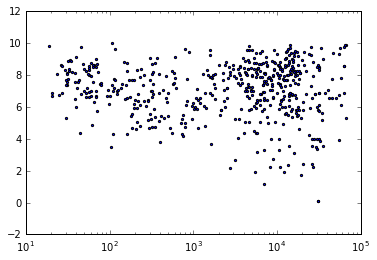

In [113]:
print len(SO11)
# print len(SO11[SO11['Prob'] > 0.5])
print len(SO_pairs)
print SO11['Seq'][-1]

plt.scatter(SO_pairs['theta'], SO_pairs['Vmag_1'], marker='.')
plt.xscale('log')

plt.show()

### Now, let's show some comparisons

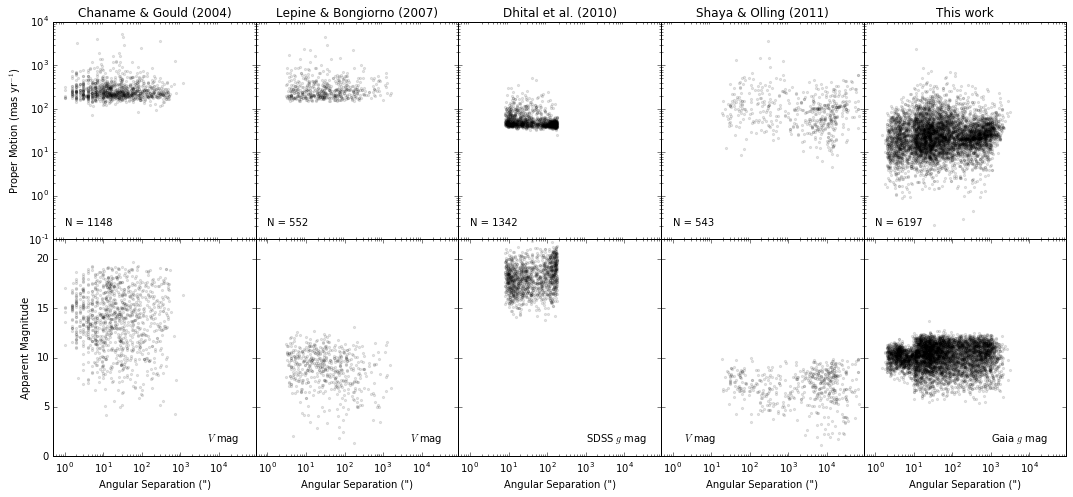

In [114]:
fig, ax = plt.subplots(2, 5, figsize=(15,7))


# Chaname & Gould (2004)
CG04_pm = np.sqrt(CG04['pmRA-A']**2 + CG04['pmDE-A']**2) * 1.0e3
ax[0,0].scatter(CG04['DelSep'], CG04_pm, color='k', marker='.', alpha=0.1, rasterized=True)
ax[1,0].scatter(CG04['DelSep'], CG04['VmagA'], color='k', marker='.', alpha=0.1, rasterized=True)
ax[0,0].set_title('Chaname & Gould (2004)')
#ax[1,1].set_ylabel(r'$V$ magnitude')
ax[0,0].text(1, 0.2, "N = " + str(len(CG04)))
ax[1,0].text(5.0e3, 1.5, r'$V$ mag')

# Lepine & Bongiorno (2007)
# LB07_pm = np.sqrt(LB07['pmRA1']**2 + LB07['pmDE1']**2) * 1.0e3
# ax[0,1].scatter(LB07['Angsep'], LB07_pm, color='k', marker='.', alpha=0.1, rasterized=True)
# ax[1,1].scatter(LB07['Angsep'], LB07['Vmag1'], color='k', marker='.', alpha=0.1, rasterized=True)
ax[0,1].scatter(LB07['theta'], LB07['mu_tot'], color='k', marker='.', alpha=0.1, rasterized=True)
ax[1,1].scatter(LB07['theta'], LB07['V'], color='k', marker='.', alpha=0.1, rasterized=True)
ax[0,1].set_title("Lepine & Bongiorno (2007)")
ax[0,1].text(1, 0.2, "N = " + str(len(LB07)))
ax[1,1].text(5.0e3, 1.5, r'$V$ mag')

# Slowpokes pairs - Dhital et al. (2010)
D10_pm = np.sqrt(D10['PMRA'].T[0]**2 + D10['PMDEC'].T[0]**2)
ax[0,2].scatter(D10['THETA'], D10_pm, color='k', marker='.', alpha=0.1, rasterized=True)
ax[1,2].scatter(D10['THETA'], D10['PSFMAG'].T[0][1], color='k', marker='.', alpha=0.1, rasterized=True) # SDSS PSF g magnitude
ax[0,2].set_title('Dhital et al. (2010)')
#ax[1,2].set_ylabel(r'SDSS $g$ magnitude')
ax[0,2].text(1, 0.2, "N = " + str(len(D10)))
ax[1,2].text(1.0e3, 1.5, r'SDSS $g$ mag')

# Hipparcos pairs - Shaya & Olling (2011)
SO11_pm = np.sqrt(SO_pairs['mu_ra_1']**2 + SO_pairs['mu_dec_1']**2)
ax[0,3].scatter(SO_pairs['theta'], SO11_pm, color='k', marker='.', alpha=0.1, rasterized=True)
ax[1,3].scatter(SO_pairs['theta'], SO_pairs['Vmag_1'], color='k', marker='.', alpha=0.1, rasterized=True) # SDSS PSF g magnitude
ax[0,3].set_title('Shaya & Olling (2011)')
#ax[1,3].set_ylabel(r'$V$ magnitude')
ax[0,3].text(1, 0.2, "N = " + str(len(SO_pairs)))
ax[1,3].text(2.0e0, 1.5, r'$V$ mag')

# Our pairs
TGAS_pm = np.sqrt(TGAS['mu_ra_1']**2 + TGAS['mu_dec_1']**2)
ax[0,4].scatter(TGAS['theta'], TGAS_pm, color='k', marker='.', alpha=0.1, rasterized=True)
ax[1,4].scatter(TGAS['theta'], TGAS['gaia_g_mag_1'], color='k', marker='.', alpha=0.1, rasterized=True)
ax[0,4].set_title('This work')
#ax[1,4].set_ylabel(r'Gaia $g$ magnitude')
ax[0,4].text(1, 0.2, "N = " + str(len(TGAS)))
ax[1,4].text(1.0e3, 1.5, r'Gaia $g$ mag')


for i in np.arange(5):
    ax[1,i].set_xscale('log')
    ax[1,i].set_xlim(0.5, 90000)
    ax[1,i].set_xlabel('Angular Separation (")')
    ax[1,i].set_ylim(0,22)
    if i != 0:
        ax[1,i].set_yticklabels([])

for i in np.arange(5):
    ax[0,i].set_xscale('log')
    ax[0,i].set_yscale('log')
    ax[0,i].set_xlim(0.5, 90000)
    ax[0,i].set_ylim(0.1, 1.0e4)
#    ax[0,i].set_xlabel('Angular Separation (")')
    ax[0,i].set_xticks([])
    if i != 0:
        ax[0,i].set_yticklabels([])
    
    
ax[0,0].set_ylabel(r'Proper Motion (mas yr$^{-1}$)')
ax[1,0].set_ylabel('Apparent Magnitude')
    


plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('../figures/compare_catalog.pdf')
#plt.show()

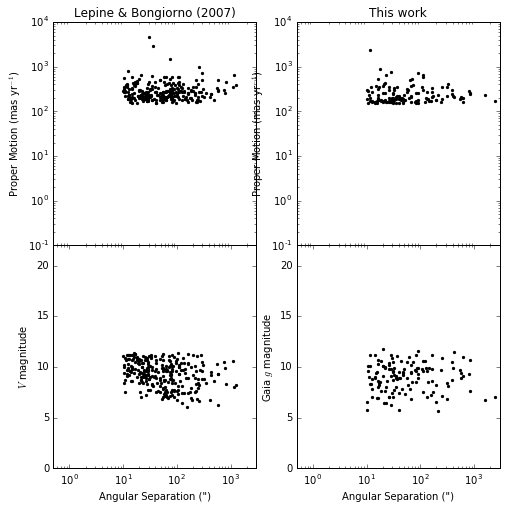

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(8,8))


idx = np.intersect1d(np.where(LB07['Vmag1'] > 6.0)[0], np.where(LB07['Vmag1'] < 11.5)[0])
idx = np.intersect1d(idx, np.where(LB07['Angsep']>10.0)[0])
# Lepine & Bongiorno (2007)
LB07_pm = np.sqrt(LB07['pmRA1']**2 + LB07['pmDE1']**2) * 1.0e3
#ax[0,0].scatter(LB07['Angsep'], LB07_pm, color='k', marker='.', rasterized=True)
#ax[1,0].scatter(LB07['Angsep'], LB07['Vmag1'], color='k', marker='.', rasterized=True)
ax[0,0].scatter(LB07['Angsep'][idx], LB07_pm[idx], color='k', marker='.', rasterized=True)
ax[1,0].scatter(LB07['Angsep'][idx], LB07['Vmag1'][idx], color='k', marker='.', rasterized=True)
ax[0,0].set_title("Lepine & Bongiorno (2007)")
ax[1,0].set_ylabel(r'$V$ magnitude')




# Our pairs
TGAS_pm = np.sqrt(TGAS['mu_ra_1']**2 + TGAS['mu_dec_1']**2)
idx = np.intersect1d(np.where(TGAS_pm > 150.0)[0], np.where(TGAS['theta']>10.0)[0])
ax[0,1].scatter(TGAS['theta'][idx], TGAS_pm[idx], color='k', marker='.', rasterized=True)
ax[1,1].scatter(TGAS['theta'][idx], TGAS['gaia_g_mag_1'][idx], color='k', marker='.', rasterized=True)
ax[0,1].set_title('This work')
ax[1,1].set_ylabel(r'Gaia $g$ magnitude')
#ax[0,1].text(1, 0.2, "N = " + str(len(TGAS)))



for i in np.arange(2):
    ax[1,i].set_xscale('log')
    ax[1,i].set_xlim(0.5, 3000)
    ax[1,i].set_xlabel('Angular Separation (")')
    ax[1,i].set_ylim(0,22)

for i in np.arange(2):
    ax[0,i].set_xscale('log')
    ax[0,i].set_yscale('log')
    ax[0,i].set_xlim(0.5, 3000)
    ax[0,i].set_ylim(0.1, 1.0e4)
    ax[0,i].set_xticks([])
    ax[0,i].set_ylabel(r'Proper Motion (mas yr$^{-1}$)')



plt.subplots_adjust(hspace=0)
plt.show()

In [42]:
def find_match(ra, dec, radius, catalog):
    theta = P_random.get_theta_proj_degree(ra, dec, catalog['ra'], catalog['dec'])
    return np.where(theta < radius)[0]
    
    
# Select only those stars in LB07 that could have been identified in TGAS
idx = np.intersect1d(np.where(LB07['Vmag1'] > 6.0)[0], np.where(LB07['Vmag1'] < 11.5)[0])
idx = np.intersect1d(idx, np.where(LB07['Angsep']>10.0)[0])


rad_1as = 20.0 / 3600.0



for i in np.arange(len(idx)):
    
    idx1 = find_match(LB07['RAdeg1'][idx][i], LB07['DEdeg1'][idx][i], rad_1as, tgas_full) 
    idx2 = find_match(LB07['RAdeg2'][idx][i], LB07['DEdeg2'][idx][i], rad_1as, tgas_full)
    
    
    if len(idx1) == 1 and len(idx2) == 1:
        
        print "Thetas:", 3600.0*P_random.get_theta_proj_degree(LB07['RAdeg1'][idx][i], LB07['DEdeg1'][idx][i], tgas_full['ra'][idx1], tgas_full['dec'][idx1]), \
                         3600.0*P_random.get_theta_proj_degree(LB07['RAdeg2'][idx][i], LB07['DEdeg2'][idx][i], tgas_full['ra'][idx2], tgas_full['dec'][idx2])
        print idx1, idx2, LB07['Angsep'][idx][i]
        
        print tgas_full[idx1]['mu_ra'], tgas_full[idx1]['mu_dec'], tgas_full[idx2]['mu_ra'], tgas_full[idx2]['mu_dec']
        print LB07['pmRA1'][i]*1.0e3, LB07['pmDE1'][i]*1.0e3, LB07['pmRA2'][i]*1.0e3, LB07['pmDE2'][i]*1.0e3
        print 


        

Thetas: [ 3.52189532] [ 18.73867035]
[110468] [110468] 18.8
[ 221.99948119] [ 45.88723614] [ 221.99948119] [ 45.88723614]
215.0 144.0 215.0 144.0

Thetas: [ 2.36401613] [ 14.67446771]
[973501] [973501] 14.7
[-83.75304829] [-128.02371528] [-83.75304829] [-128.02371528]
13.0 -286.0 19.0 -294.0

Thetas: [ 11.92914815] [ 7.14215398]
[941915] [941915] 12.2
[ 154.33773482] [-790.14332735] [ 154.33773482] [-790.14332735]
1290.0 -2010.0 1336.0 -1963.0

Thetas: [ 4.6927364] [ 12.27573533]
[177299] [177299] 12.9
[ 250.52091419] [ 184.98513174] [ 250.52091419] [ 184.98513174]
19.0 -196.0 11.0 -185.0

Thetas: [ 2.9696084] [ 13.09995306]
[180008] [180008] 13.5
[ 191.61299164] [ 36.15182792] [ 191.61299164] [ 36.15182792]
-27.0 -237.0 -34.0 -227.0

Thetas: [ 6.62392689] [ 13.90209554]
[78412] [78412] 18.2
[ 410.38785193] [-124.94718246] [ 410.38785193] [-124.94718246]
-413.0 398.0 -432.0 399.0

Thetas: [ 2.85765727] [ 16.64206644]
[279734] [279734] 13.8
[-186.20146454] [-26.17737004] [-186.20146454]